# Performing EDA & Implementing Logistic Regression on Algerian forest fires dataset

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely â€œFireâ€ and â€œnot Fireâ€

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skl
sns.set()

In [2]:
df = pd.read_csv('Algerian_forest_fires_dataset.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


## Data Cleaning & Label Encoding

In [3]:
df.drop([122,123,124], inplace = True)
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4    RH          244 non-null    object
 5    Ws          244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
dtypes: object(14)
memory usage: 26.8+ KB


In [5]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [6]:
df.columns = [co.strip() for co in df.columns]
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [7]:
# we adding a new column Region to dataset
# rows 1 = Bejaia Region and 0 = Sidi Bel-abbes Region
df['Region'] = 1
for i in range(len(df)):
    if i >= 122:
        df['Region'][i] = 0

C:\Users\Thanmai\AppData\Local\Temp/ipykernel_14092/3918257608.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Region'][i] = 0


In [8]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', nan, 'not fire    '], dtype=object)

In [9]:
df['Classes'] = df['Classes'].str.strip()
df['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

In [10]:
df[df['Classes'].isnull()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
165,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,0


In [11]:
df['FWI'] = df.FWI.apply(lambda x: x.replace('fire', ''))# For replce the string fire with empty string from FWI attribute
df[df['Classes'].isnull()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
165,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,,NaN,0


In [12]:
df['FWI'] = df.FWI.replace(r'^\s*$', np.nan, regex=True) # replacing null value with NAN

In [13]:
 #Let's relpace the class value with mode
modeValueRating = df['Classes'].mode()
df['Classes'].fillna(value=modeValueRating[0], inplace = True) 
#Now, let's relpace the FWI value with Median
df['FWI'].fillna(df['FWI'].median(), inplace = True) 
#relpace the blank space in DC
df['DC'] = df.DC.apply(lambda x: x.replace(' ', '')) 

In [14]:
df.isnull().sum().sum()

0

In [15]:
# Statistical summary of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Region,244.0,0.5,0.501028,0.0,0.0,0.5,1.0,1.0


In [16]:
#Let's check the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      244 non-null    object
 14  Region       244 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.7+ KB


## Changing dtypes to numerical

In [17]:
df = df.astype({'RH':np.int64, 'Temperature':np.int64, 'Ws':np.int64, 'Rain':np.float64, 'FFMC':np.float64
               ,'DMC':np.float64, 'DC':np.float64, 'ISI':np.float64, 'BUI':np.float64,
               'FWI':np.float64})

In [18]:
# Printing all the categorical columns
categorical_col = [fea for fea in df.columns if df[fea].dtype == 'O']
print('Categorical columns--',categorical_col)

# Printing all the numerical columns
numerical_col = [fea for fea in df.columns if df[fea].dtype != 'O']
print('Numerical columns--',numerical_col)

Categorical columns-- ['day', 'month', 'year', 'Classes']
Numerical columns-- ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Region']


## Distribution Numerical Features of our Dataset

C:\Users\Thanmai\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


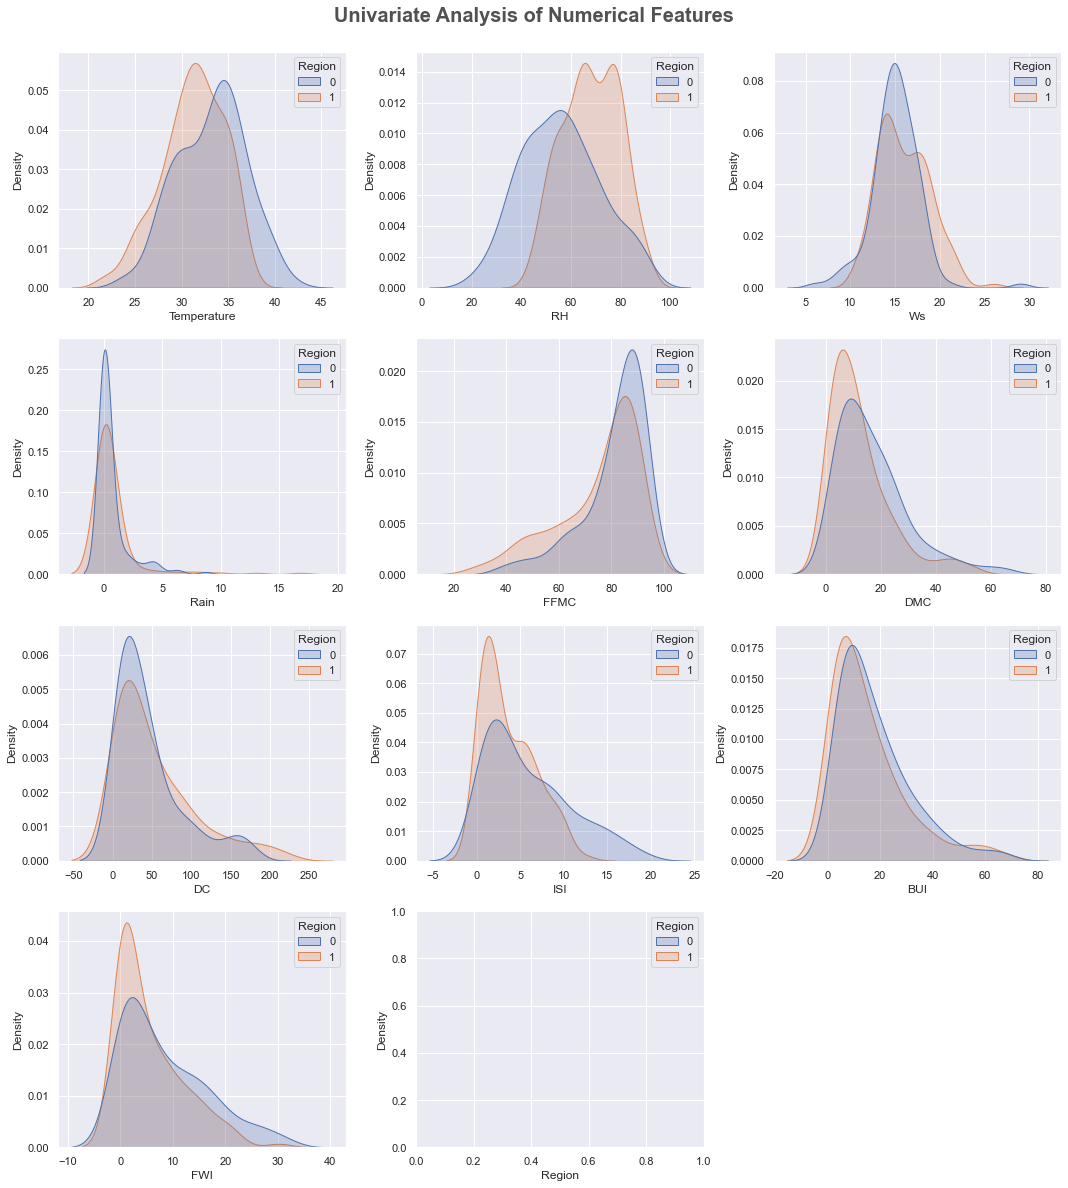

In [19]:
plt.figure(figsize=(15, 20))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numerical_col)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numerical_col[i]],shade=True, color='b',hue='Region',data=df)
    plt.xlabel(numerical_col[i])
    plt.tight_layout()

## Distribution Categorical Features of our Dataset

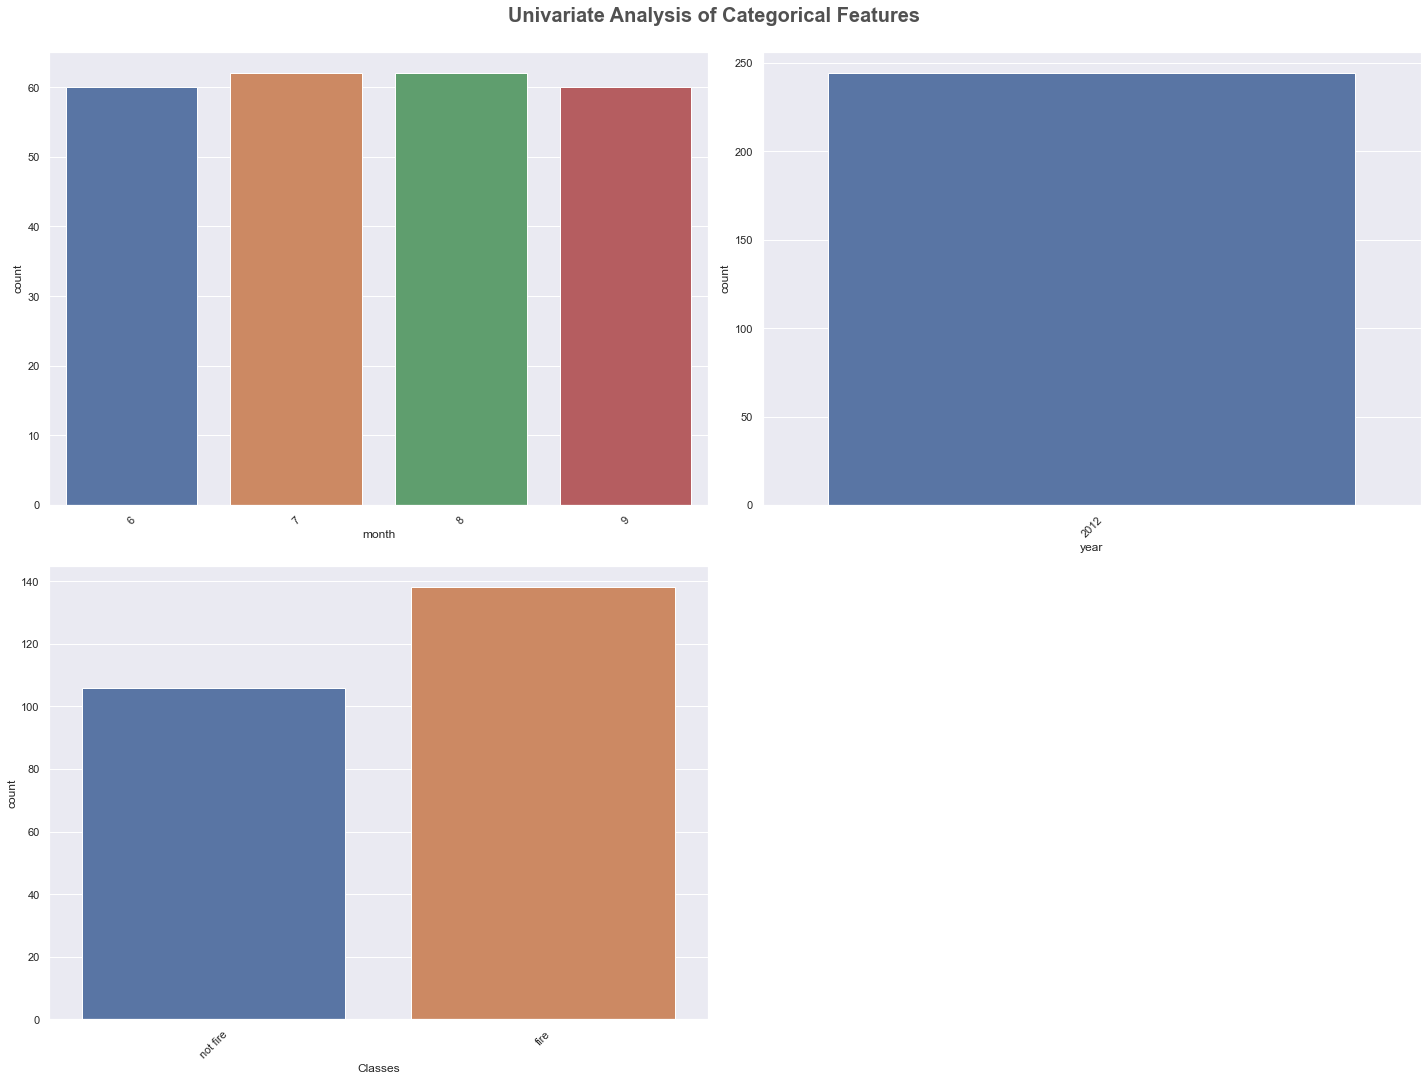

In [20]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
cat1 = ['month', 'year', 'Classes']
for i in range(0, len(cat1)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

## Checking for Correlation

In [21]:
df[numerical_col].corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370511,0.607551,0.455504,0.562344,-0.273496
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220344,-0.690637,-0.348587,-0.574773,0.406424
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076253,0.015248,0.029756,0.030910,0.176829
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296808,-0.347105,-0.299171,-0.323831,0.041080
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503919,0.739730,0.589652,0.688876,-0.224680
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875362,0.674499,0.982073,0.875791,-0.191094
DC,0.370511,-0.220344,0.076253,-0.296808,0.503919,0.875362,1.000000,0.498926,0.941906,0.739634,0.081482
ISI,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.498926,1.000000,0.635891,0.913163,-0.268421
BUI,0.455504,-0.348587,0.029756,-0.299171,0.589652,0.982073,0.941906,0.635891,1.000000,0.858065,-0.087370
FWI,0.562344,-0.574773,0.030910,-0.323831,0.688876,0.875791,0.739634,0.913163,0.858065,1.000000,-0.195070


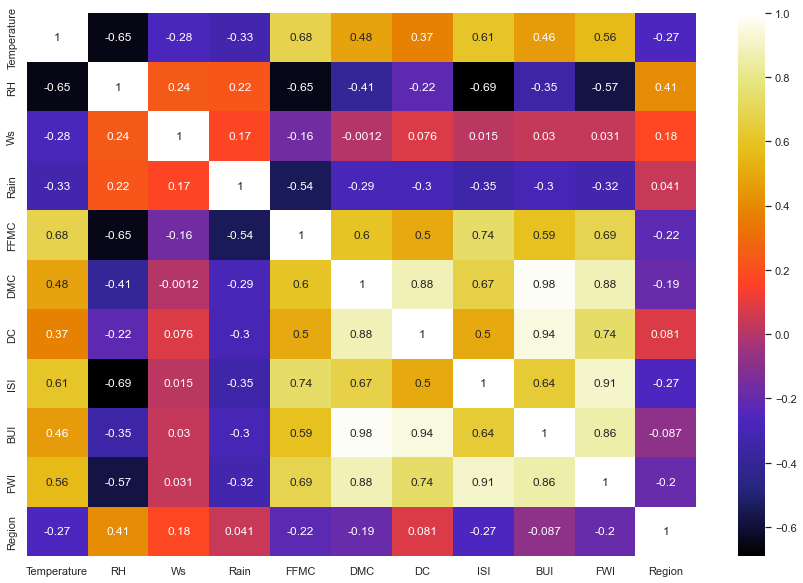

In [22]:
plt.figure(figsize = (15,10))
sns.heatmap(df[numerical_col].corr(), cmap="CMRmap", annot=True)
plt.show()

## Plotting Relationship Between Independent & Target Variables

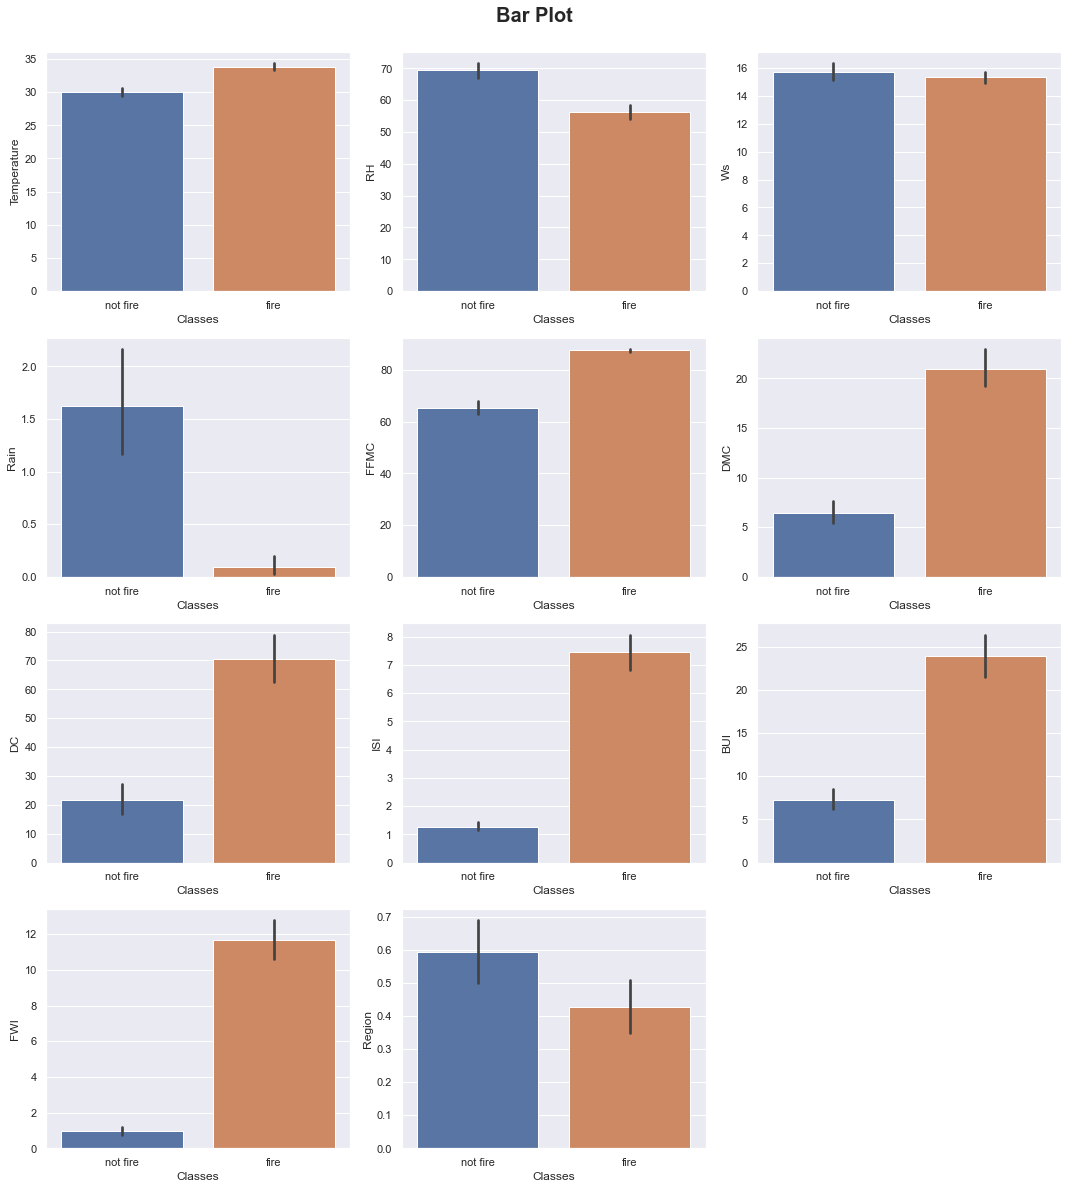

In [23]:
plt.figure(figsize=(15, 20))
plt.suptitle('Bar Plot', fontsize=20, fontweight='bold', alpha=1, y=1)

for i in range(0, len(numerical_col)):
    plt.subplot(5, 3, i+1)
    sns.barplot(y=numerical_col[i], x='Classes', data=df)
    plt.tight_layout()

## Plotting Relation Between Temperature & Fire

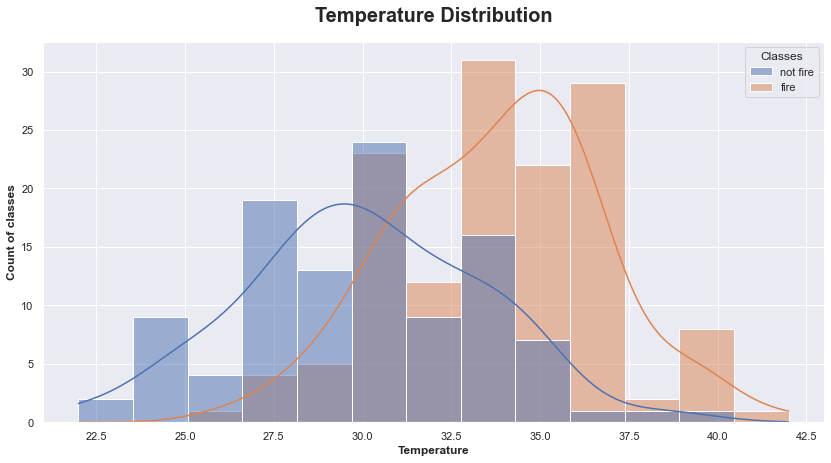

In [24]:
features = ['Temperature', 'Classes']
Temperature_df = df[features]
plt.subplots(figsize=(14,7))
sns.histplot( data=Temperature_df,x=Temperature_df['Temperature'], hue='Classes', color = 'g',kde=True)
#sns.histplot(Temperature_df.Temperature, color='g', kde=True)
plt.title("Temperature Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count of classes", weight="bold", fontsize=12)
plt.xlabel("Temperature", weight="bold", fontsize=12)
plt.show()

Most of the time fire occurred in between 32 to 42.5 degree

In [25]:
df['Temperature'].describe()

count    244.000000
mean      32.172131
std        3.633843
min       22.000000
25%       30.000000
50%       32.000000
75%       35.000000
max       42.000000
Name: Temperature, dtype: float64

## Plotting correlation between Temperature & Rain features

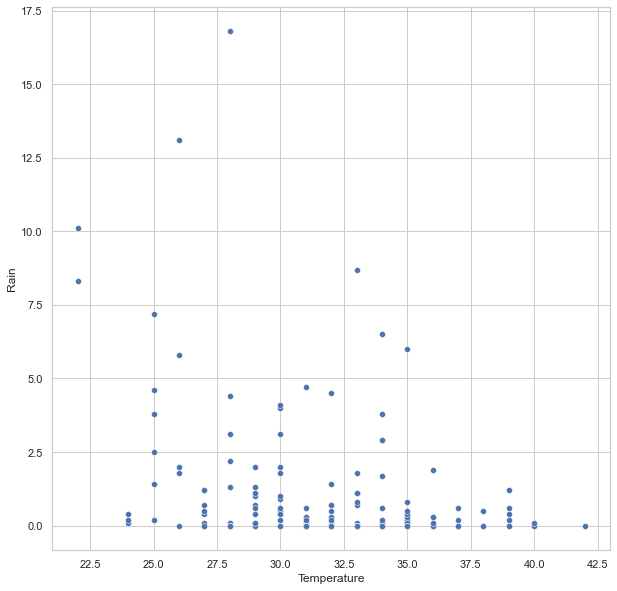

In [33]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,10))
sns.scatterplot(x=df['Temperature'],y=df['Rain'],data=df)
df['Temperature'].corr(df['Rain'])
#print("Correlation value is",df['DMC'].df['DC'])
plt.show()

# Train Test Split

In [36]:
X = df.iloc[:, 3:13]
y = df['Classes']
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5
...,...,...,...,...,...,...,...,...,...,...
239,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5
240,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0
241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2
242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7


In [37]:
y 

0      not fire
1      not fire
2      not fire
3      not fire
4      not fire
         ...   
239        fire
240    not fire
241    not fire
242    not fire
243    not fire
Name: Classes, Length: 244, dtype: object

In [38]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(170, 10) (74, 10)
(170,) (74,)


# Logistic Regression
Logistic Regression is the extension of ‘Linear regression’. Target variable in linear regression model will be continuous. Whereas in this algorithm the target variable will be discrete. So if our prediction needs to be discrete, we can use Logistic regression. We need not get carried away from the name as it is holding “regression”. This algorithm is built for classification problems.

Classification problems are also called as binary problems, where the output will be between 2 classes. It is either 0 or 1/Yes or No.
Function used in this algorithm is “Sigmoid” or “Logistic” which is represented as
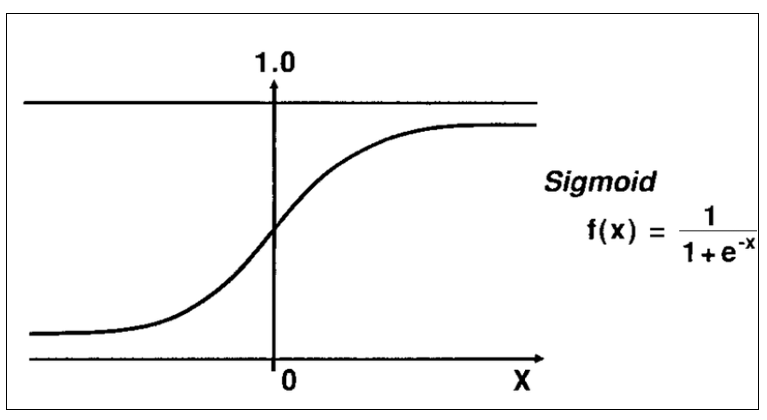

In [40]:
log_reg = LogisticRegression()

log_reg.fit(X_train,y_train)

C:\Users\Thanmai\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
print(log_reg.coef_)
print(log_reg.intercept_)

[[ 0.34518088  0.01648984  0.2947388  -0.52687827 -0.11698837  0.17015191
  -0.02407884 -1.38469931  0.16852135 -1.87257507]]
[0.12822092]


In [49]:
y_pred = log_reg.predict(X_test)

dataset = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dataset.head(30)

,Actual,Predicted
64,fire,fire
63,not fire,not fire
55,fire,fire
111,fire,fire
225,fire,fire
92,not fire,not fire
76,fire,not fire
181,fire,fire
188,not fire,not fire
180,fire,fire


We can see from the above comparision between actual and predicted value that the accuracy of the model is good.
Now let's calculate the performance metrics.

# Performance Metrics
These are some frequently used metrics in industry for classification problems to measure accuracy percentages and error levels they are as follows:

a. Confusion Matrix, b. Classification Report, c. ROC Curve & d. Accuracy Score

# Confusion Matrix
Confusion Matrix below is used to find the amount of values which are predicted correctly & wrongly.
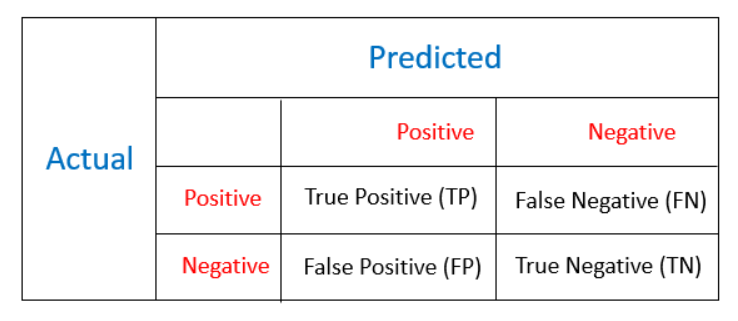

In [51]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[38,  2],
       [ 0, 34]], dtype=int64)

In [52]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

## Accuracy
Accuracy is defined as the number of correct predictions over the total predictions:
accuracy = correct_predictions / total_predictions

However, we can further expand on this using these:

- True Positive (TP) - you predicted positive and it’s actually positive 
- True Negative (TN) - you predicted negative and it’s actually negative
- False Positive (FP) - you predicted positive and it’s actually negative
- False Negative (FN) - you predicted negative and it’s actually positive 
So we can say the true predictions are TN+TP, while the false prediction is FP+FN. The equation can now be redefined as:
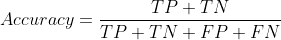

In [45]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.972972972972973

## Precision and Recall
 

If we want to further test the “accuracy” in different classes where we want to ensure that when the model predicts positive, it is in fact true positive - we use precision. We can also call this Positive Prediction Value which can be defined as:
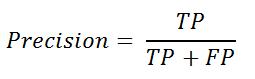

In [53]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.95

In [54]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

1.0

## F1 Score
This is defined as Harmonic mean between Precision and Recall values
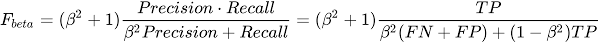

In [55]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9743589743589743